# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service!

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active.

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [2]:
import pandas as pd
url_description = r'/content/drive/MyDrive/data_descriptions.csv'
description_data = pd.read_csv(url_description)
description_data

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly ba...
2,TotalCharges,Feature,float,The total charges incurred by the user over th...
3,SubscriptionType,Feature,object,The type of subscription chosen by the user (B...
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paper...
6,ContentType,Feature,string,The type of content preferred by the user (Mov...
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the s...
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV,..."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching c...


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest




## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_url = r'/content/drive/MyDrive/train.csv'
train_df = pd.read_csv(train_url)
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [6]:
test_url = r'/content/drive/MyDrive/test.csv'
test_df = pd.read_csv(test_url)
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [7]:
# your code here (optional)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [9]:
# let us check for missing values
train_df.isnull().any().any()

False

the datasets does not contain any missing values

In [10]:
# check for duplicates vallues
train_df.duplicated().any()

False

there are no duplicate values in the datasets and the column format are all consistent

### Exploratory Data Analysis

In [11]:
# let us describe the train_df datasets
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountAge,243787.0,60.083758,34.285143,1.000000,30.000000,60.000000,90.000000,119.000000
MonthlyCharges,243787.0,12.490695,4.327615,4.990062,8.738543,12.495555,16.238160,19.989957
TotalCharges,243787.0,750.741017,523.073273,4.991154,329.147027,649.878487,1089.317362,2378.723844
ViewingHoursPerWeek,243787.0,20.502179,11.243753,1.000065,10.763953,20.523116,30.219396,39.999723
AverageViewingDuration,243787.0,92.264061,50.505243,5.000547,48.382395,92.249992,135.908048,179.999275
ContentDownloadsPerMonth,243787.0,24.503513,14.421174,0.000000,12.000000,24.000000,37.000000,49.000000
UserRating,243787.0,3.002713,1.155259,1.000007,2.000853,3.002261,4.002157,4.999989
SupportTicketsPerMonth,243787.0,4.504186,2.872548,0.000000,2.000000,4.000000,7.000000,9.000000
WatchlistSize,243787.0,12.018508,7.193034,0.000000,6.000000,12.000000,18.000000,24.000000
Churn,243787.0,0.181232,0.385211,0.000000,0.000000,0.000000,0.000000,1.000000


In [12]:
# count the occurrences of each unique value in the 'Churn' column
churn_counts = train_df['Churn'].value_counts()

# Calculate the churn rate
total_customers = train_df['Churn'].count()
churn_rate = churn_counts[1] / total_customers

# Print out the descriptive statistics
print("Descriptive Statistics for Churn:")
print(churn_counts)
print(f"Churn Rate: {churn_rate:.2%}")

Descriptive Statistics for Churn:
0    199605
1     44182
Name: Churn, dtype: int64
Churn Rate: 18.12%


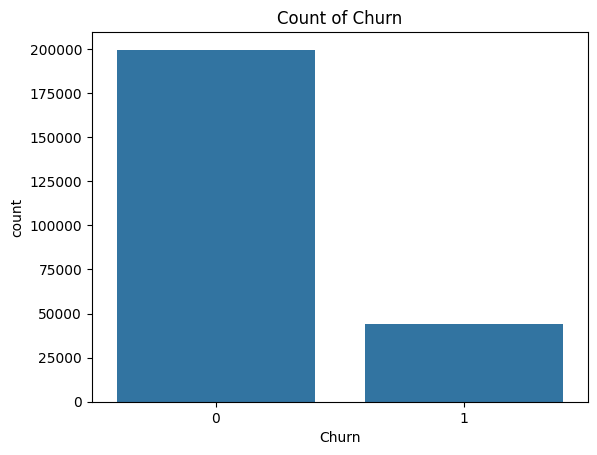

In [13]:
# plotting with target feature
sns.countplot(data=train_df, x='Churn')
plt.title('Count of Churn')
plt.show()


### from the descriptive statistics we just performed, we can say that out of the 243787 customers about 199605 customers are still loyal to the service while about 44182 customers have churned. this is about 18.12% of the whole customers

let investigate the possible amount in total that will be lost to churn

In [14]:
loss = []
for values in train_df.loc[train_df['Churn'] == 1,'TotalCharges']:
    value = float(values)
    loss.append(value)
    total_sum = np.round(sum(loss))
print('we will loose:', total_sum)

we will loose: 27248710.0


We have lost arround $27248710 due to customer churn

### Separate into Numerical and Categorical feature

In [15]:
train_df.drop(columns=['CustomerID'], inplace=True)

In [16]:
# numerical feature
numerical_feature = {feature for feature in train_df.columns if train_df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')


Count of Numerical feature: 10
Numerical feature are:
 {'Churn', 'WatchlistSize', 'MonthlyCharges', 'AverageViewingDuration', 'TotalCharges', 'ContentDownloadsPerMonth', 'UserRating', 'ViewingHoursPerWeek', 'SupportTicketsPerMonth', 'AccountAge'}


In [17]:
# Categorical feature
categorical_feature = {feature for feature in train_df.columns if train_df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')


Count of Categorical feature: 10
Categorical feature are:
 {'ParentalControl', 'ContentType', 'SubscriptionType', 'GenrePreference', 'SubtitlesEnabled', 'PaperlessBilling', 'PaymentMethod', 'DeviceRegistered', 'MultiDeviceAccess', 'Gender'}


<ipython-input-18-6cf4dd6a44e7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[feature], bins=30, kde=True)
<ipython-input-18-6cf4dd6a44e7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[feature], bins=30, kde=True)
<ipython-input-18-6cf4dd6a44e7>:8: UserWarning: 

`distplo

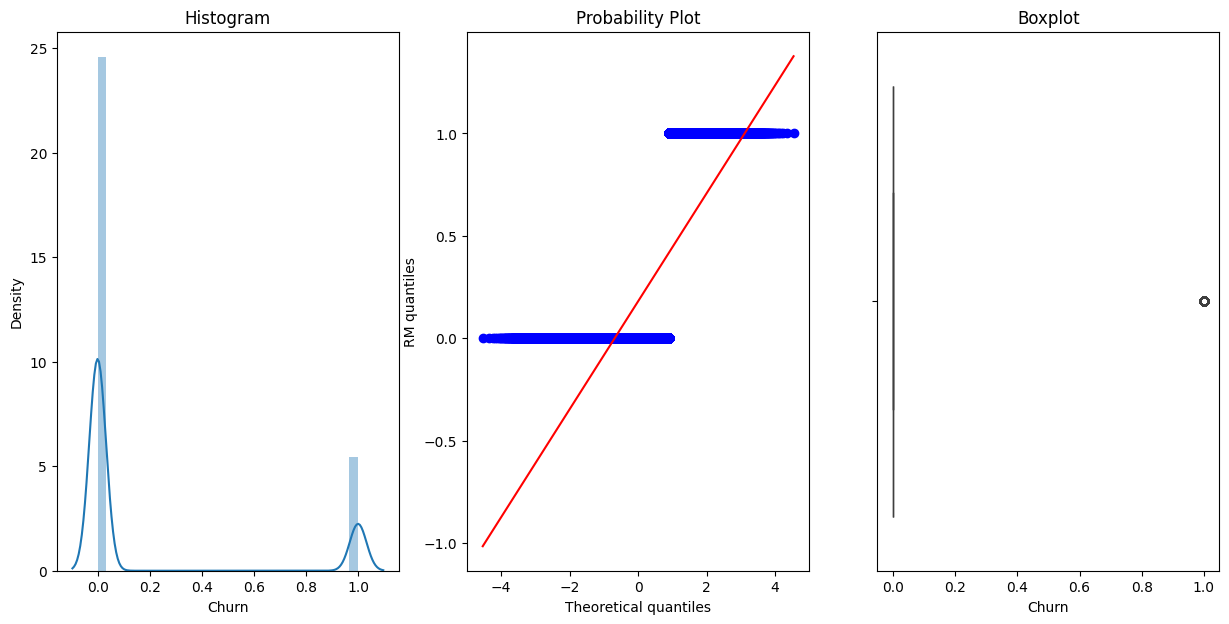

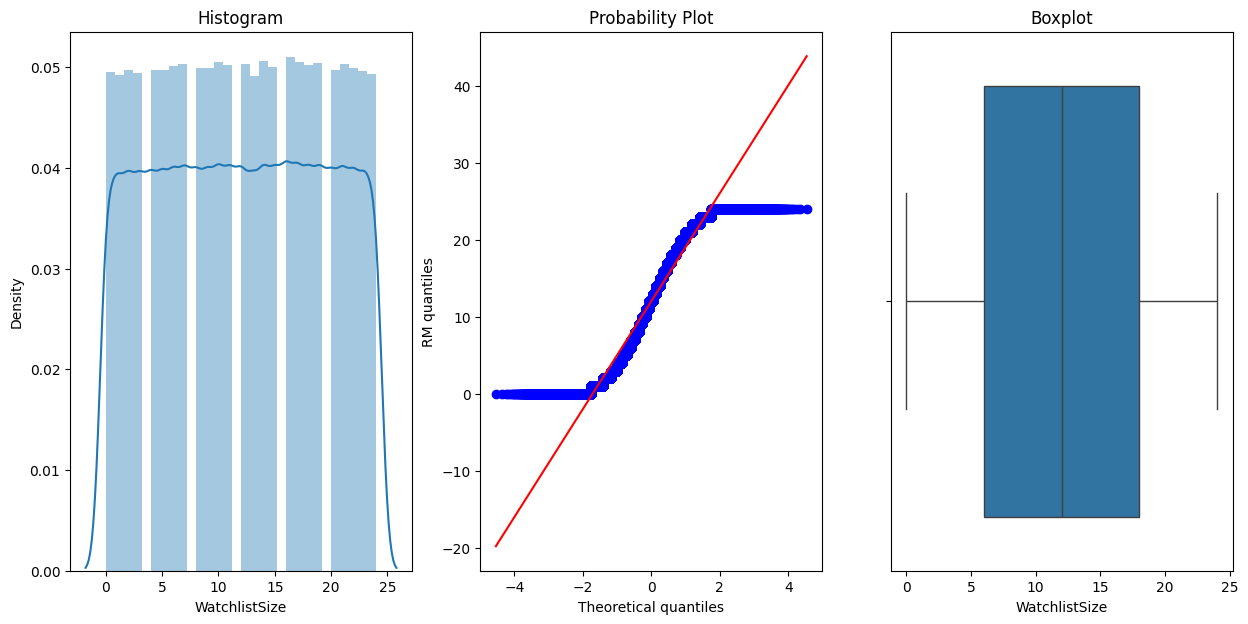

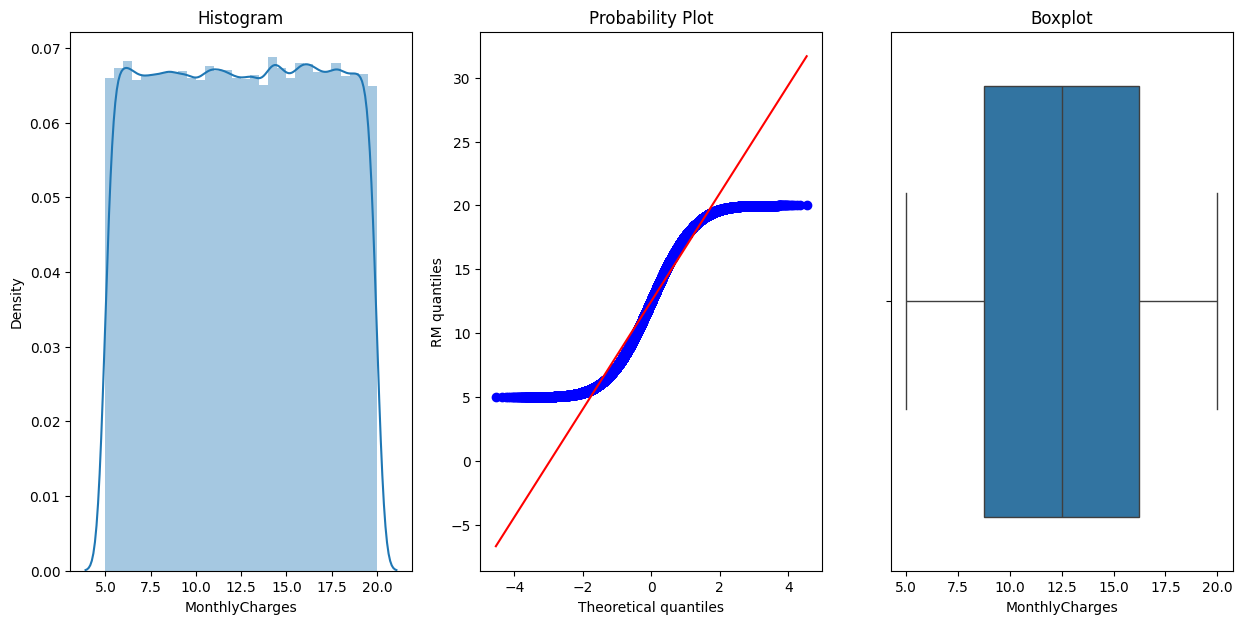

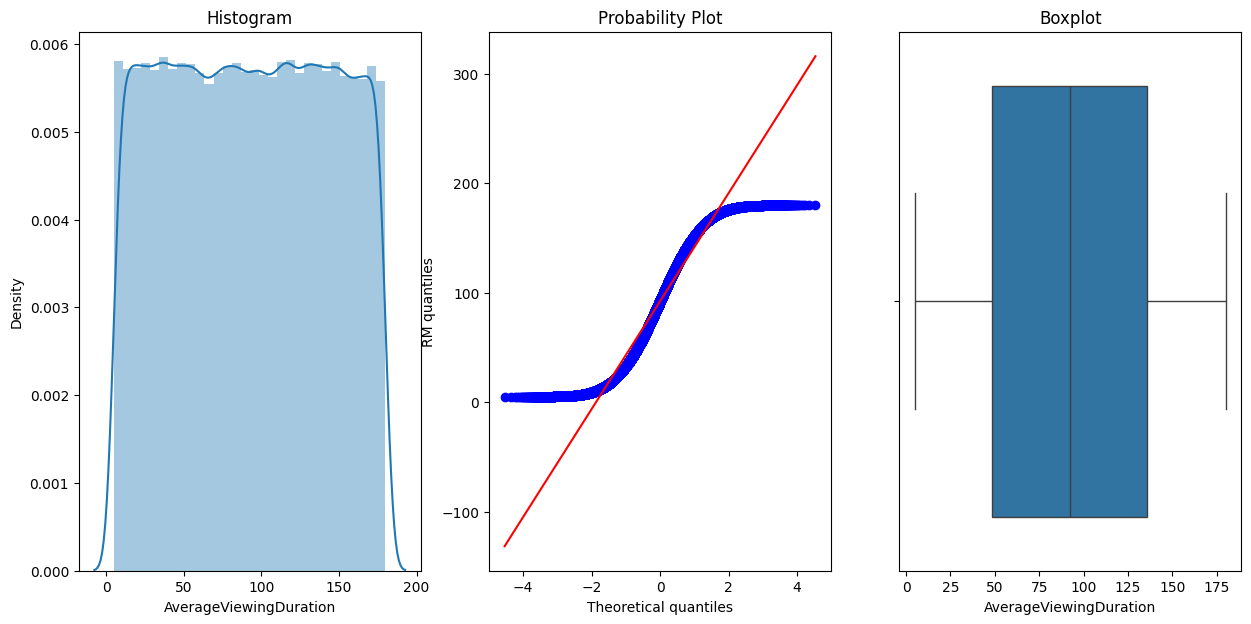

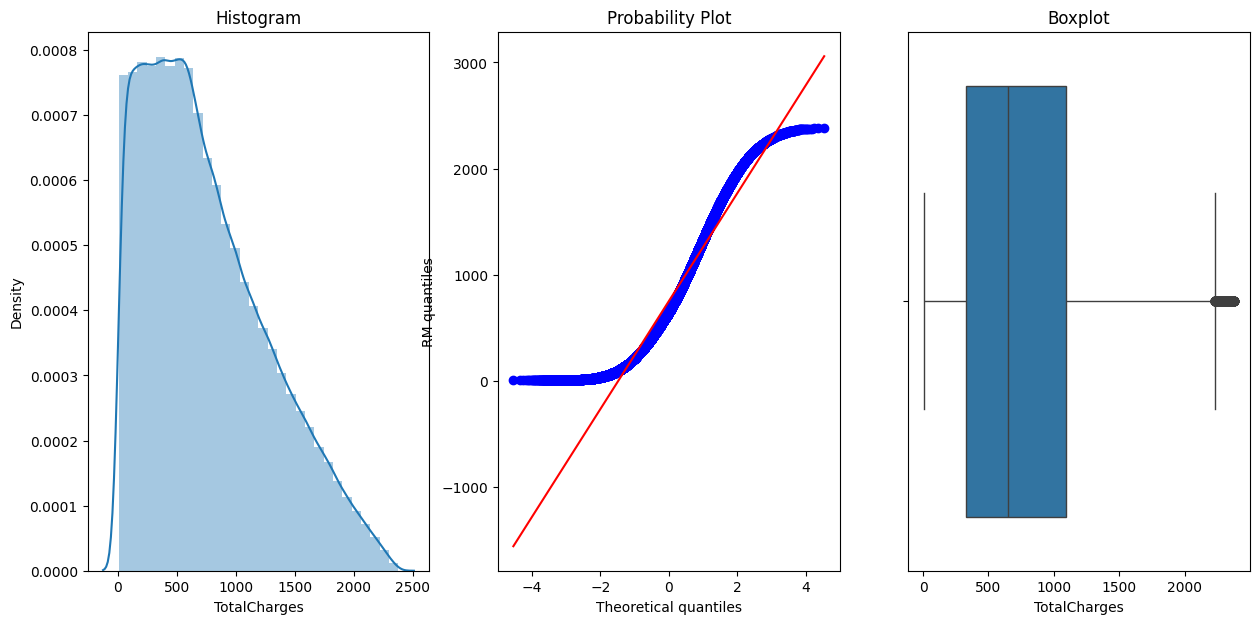

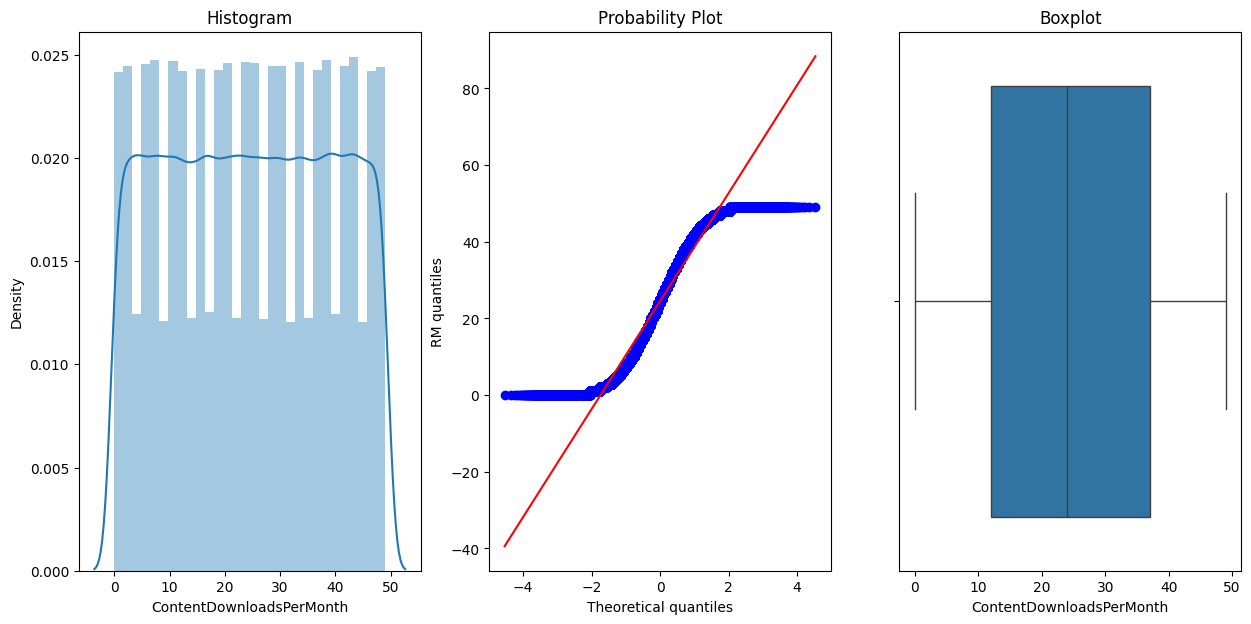

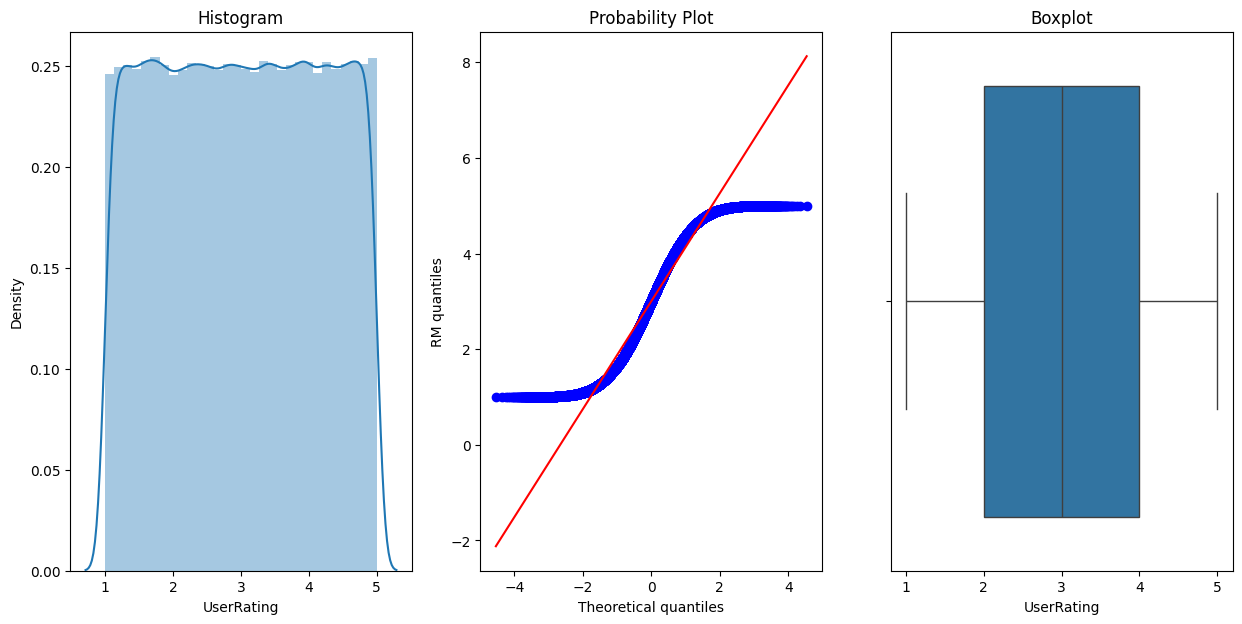

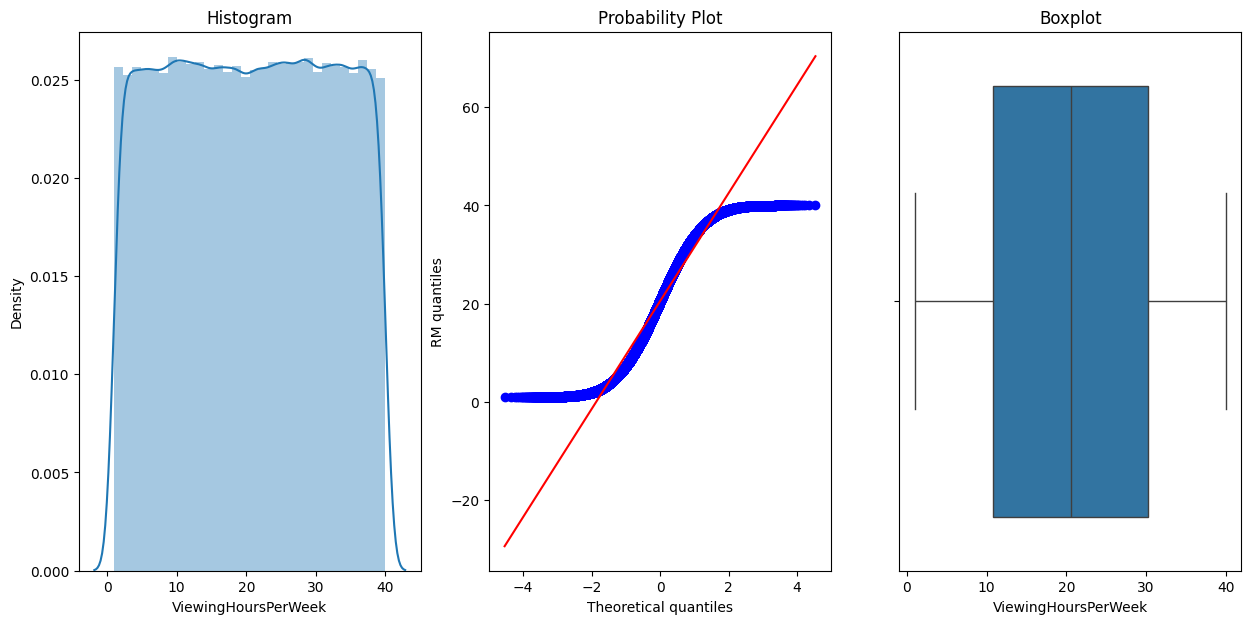

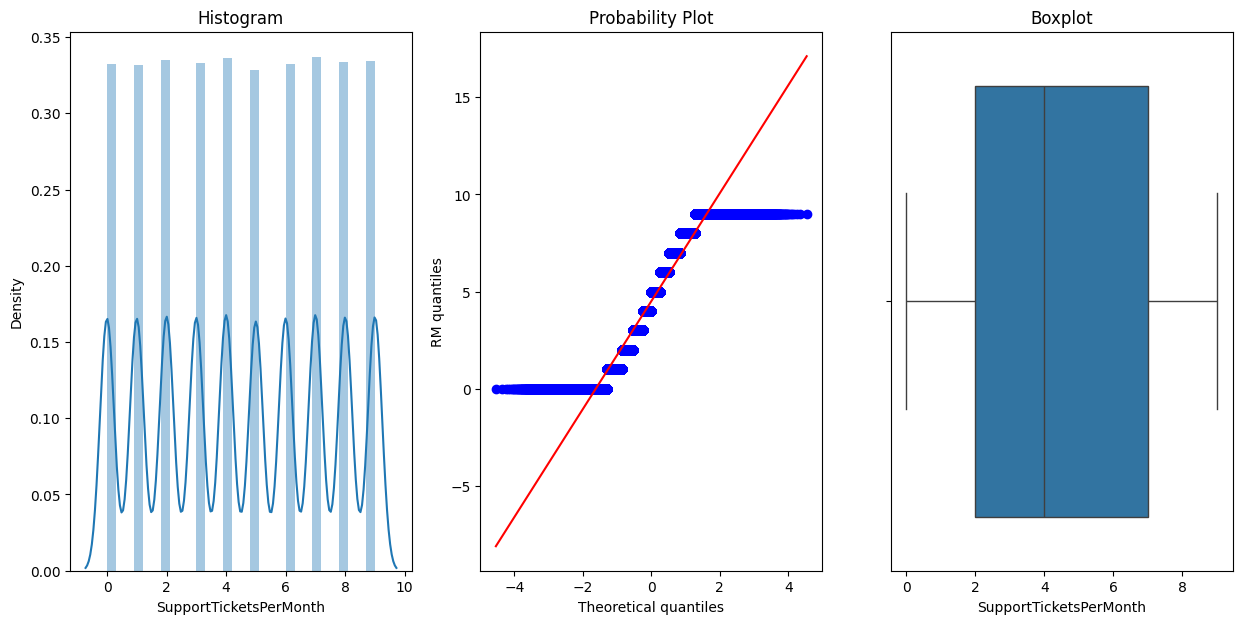

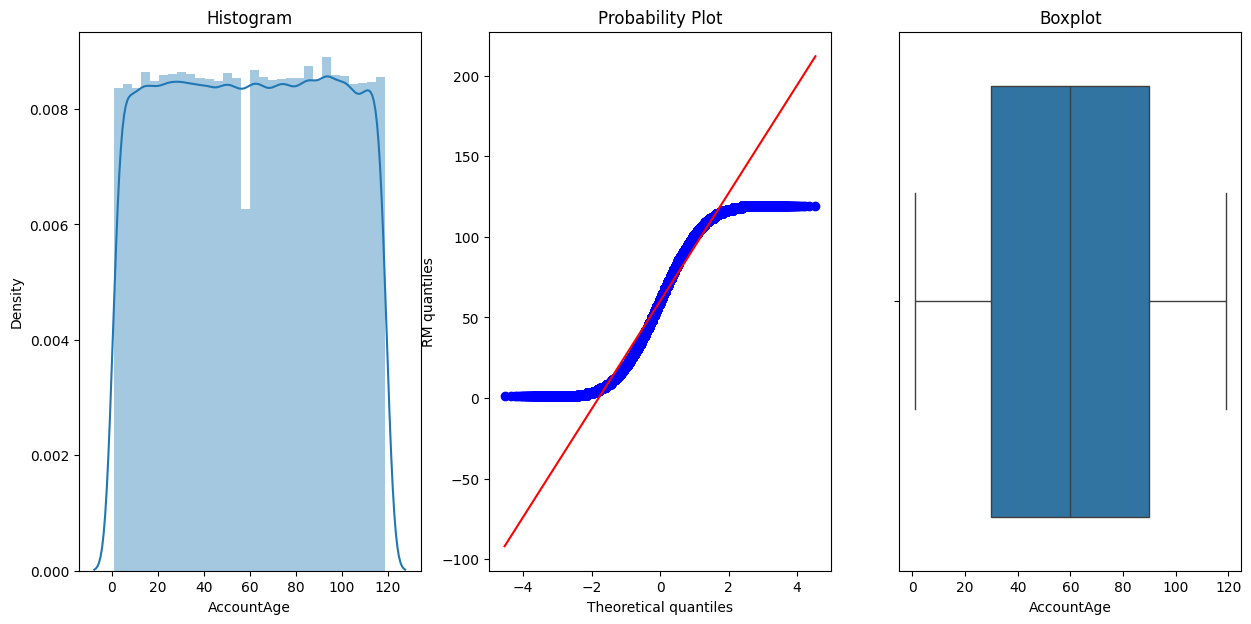

In [18]:
from scipy import stats  # Import scipy.stats module
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))

        plt.subplot(1, 3, 1)
        sns.distplot(train_df[feature], bins=30, kde=True)
        plt.title('Histogram')

        plt.subplot(1, 3, 2)
        stats.probplot(train_df[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')

        plt.subplot(1, 3, 3)
        sns.boxplot(x=train_df[feature])
        plt.title('Boxplot')

plt.show()


### After ploting histogram probability distribution and box plot to find numerical value are in normally distribution and our dataset has no outlier dataset.So, we don't want to remove the outlier in our dataset


## Univariante Data Visualizations

we will perform some visualisations to help us understand the datasets and the churn behaviour accross the varius variables

In [19]:
def bar_plot(data, group, target):
    """
    This function returns a bar plot.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    # This will create a pivot table to be plotted
    temp_df = (data.groupby([group, target]).size() / data.groupby(group)[target].count()).reset_index().pivot(index=group, columns=target, values=0)
    # We plot the stacked bar
    temp_df.plot(kind='bar', stacked=False, ax=ax, color=["blue", "darkred", "green"], legend=True)
    # Set labels and axis
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn percentage')

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

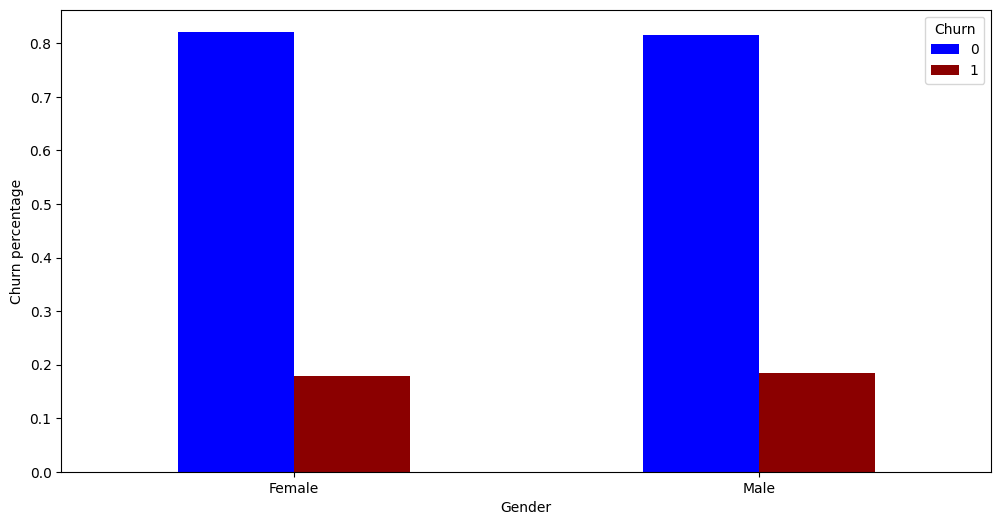

In [21]:
bar_plot(train_df, "Gender", "Churn")

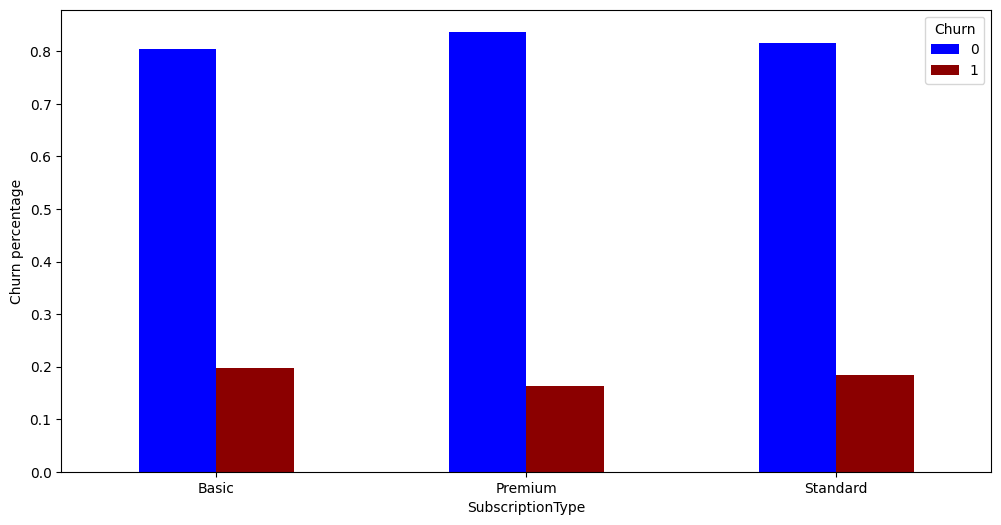

In [22]:
bar_plot(train_df, "SubscriptionType", "Churn")

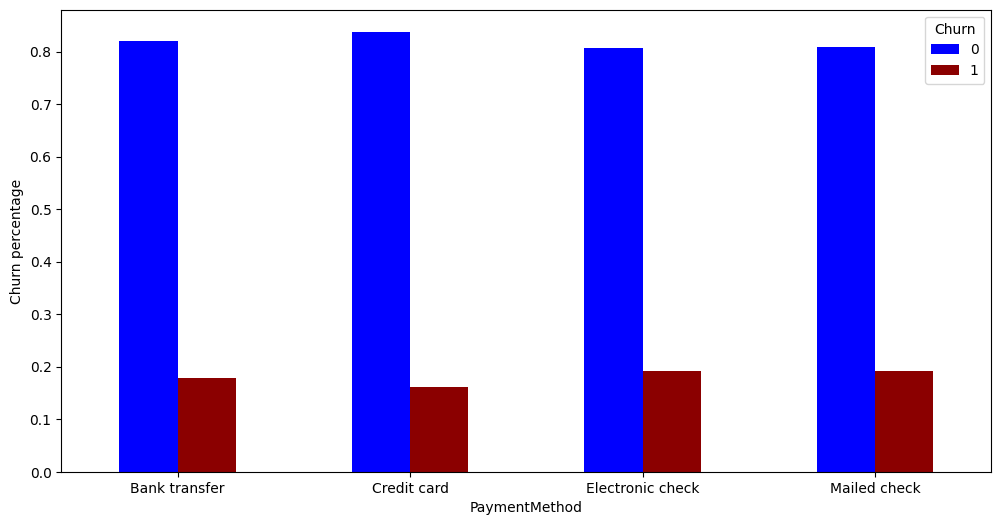

In [23]:
bar_plot(train_df, "PaymentMethod", "Churn")

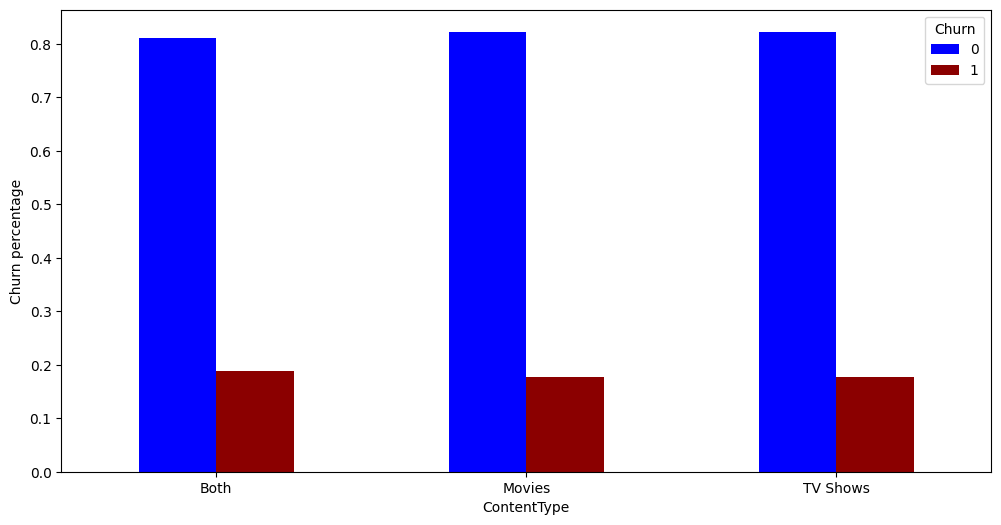

In [24]:
bar_plot(train_df, "ContentType", "Churn")

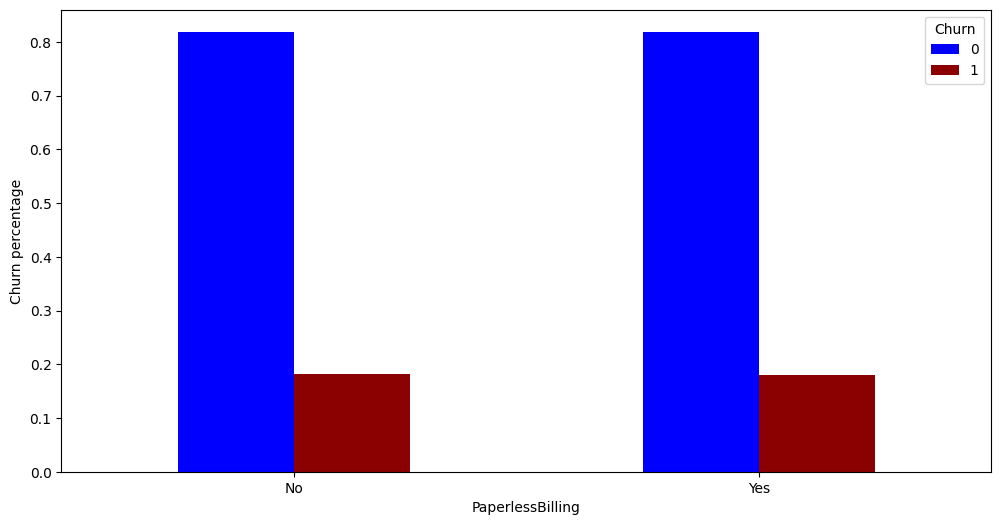

In [25]:
bar_plot(train_df, "PaperlessBilling", "Churn")

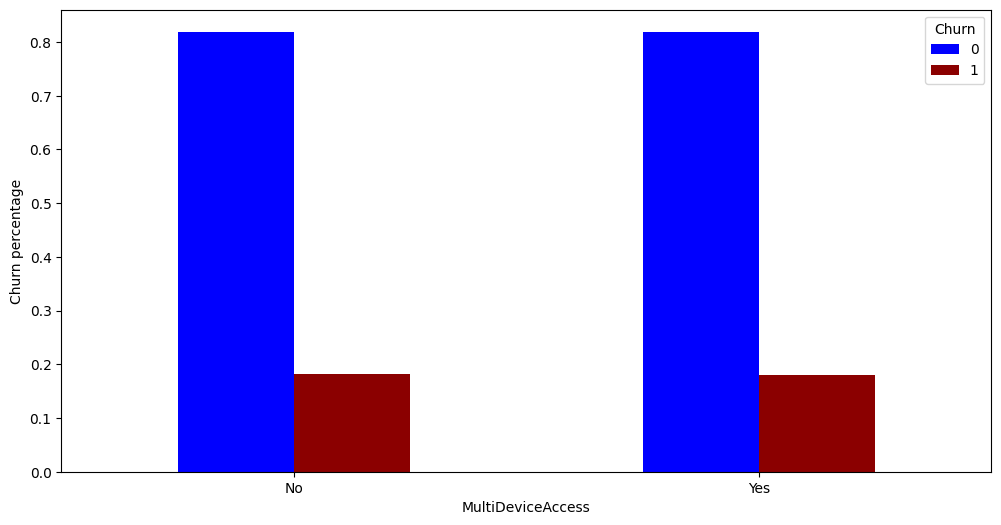

In [26]:
bar_plot(train_df, "MultiDeviceAccess", "Churn")

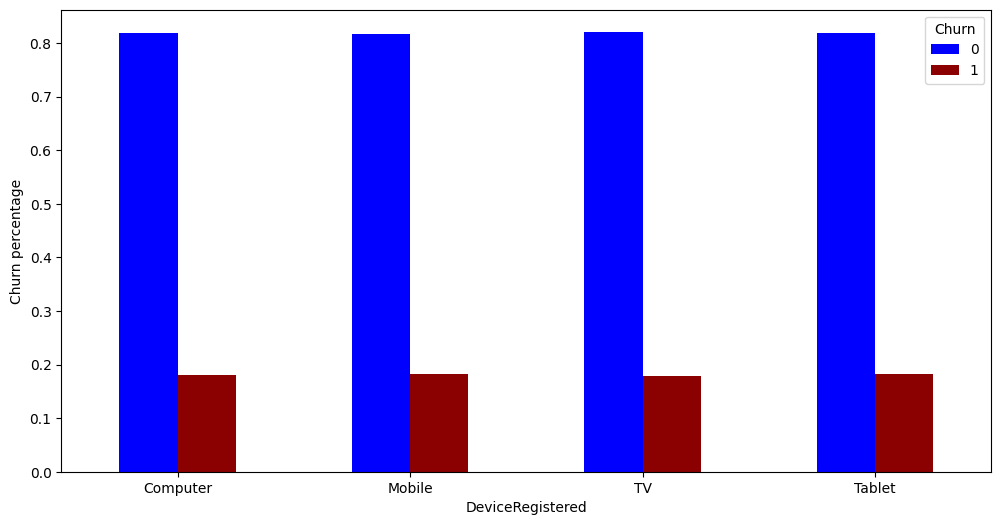

In [27]:
bar_plot(train_df, "DeviceRegistered", "Churn")

In [28]:
train_df['ContentDownloadsPerMonth'].value_counts()

17    4999
8     4996
39    4995
23    4959
40    4952
43    4952
44    4951
4     4949
33    4929
42    4922
11    4917
3     4914
10    4912
26    4912
16    4911
29    4902
21    4901
5     4897
30    4893
37    4890
34    4889
20    4887
12    4880
22    4880
35    4879
25    4878
49    4877
6     4875
14    4871
46    4867
27    4864
7     4860
38    4860
24    4855
0     4851
19    4849
31    4841
28    4841
48    4838
18    4819
2     4817
9     4814
41    4812
32    4802
45    4795
47    4776
36    4775
15    4765
1     4763
13    4754
Name: ContentDownloadsPerMonth, dtype: int64

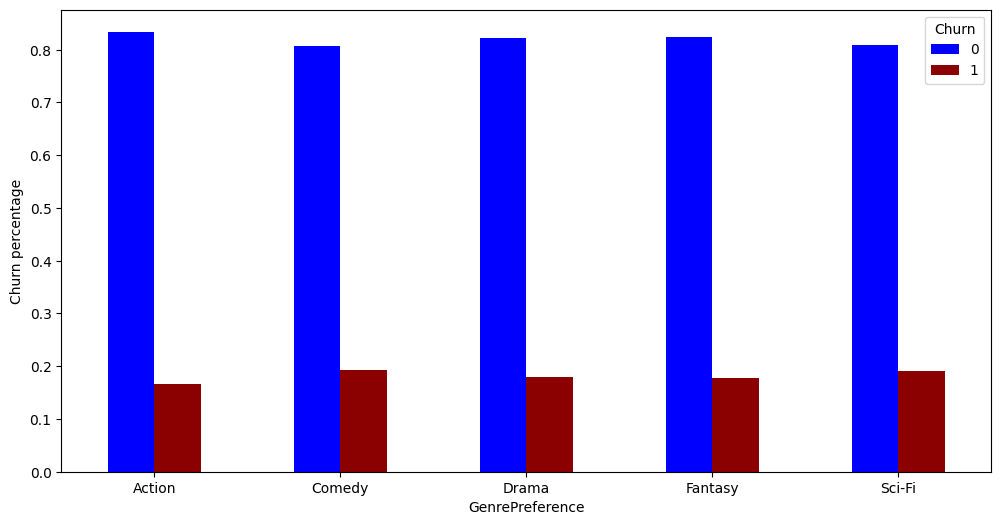

In [29]:
bar_plot(train_df, "GenrePreference", "Churn")

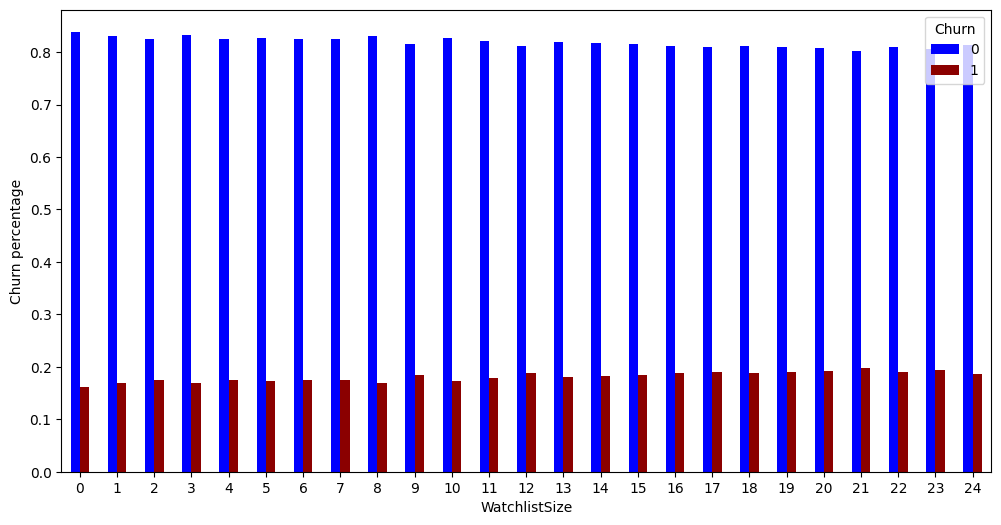

In [30]:
bar_plot(train_df, "WatchlistSize", "Churn")

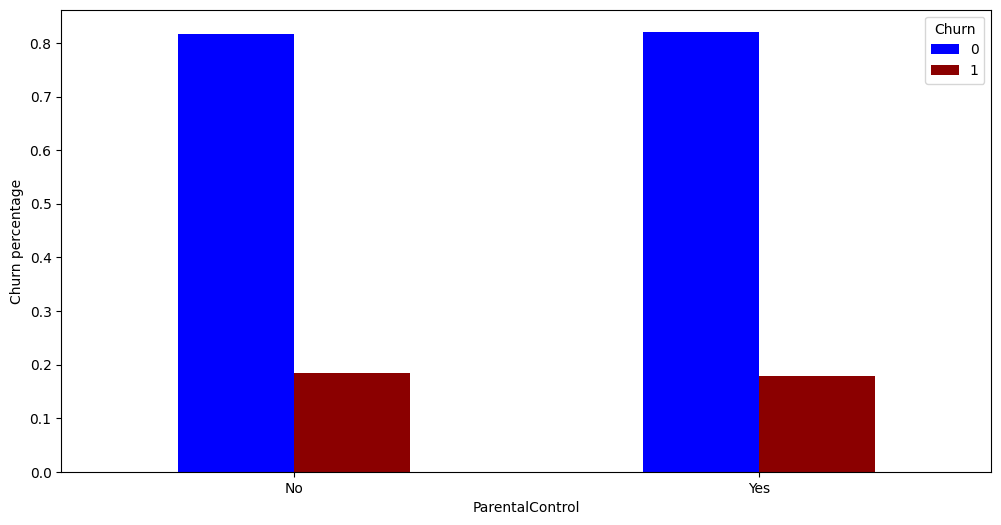

In [31]:
bar_plot(train_df, "ParentalControl", "Churn")

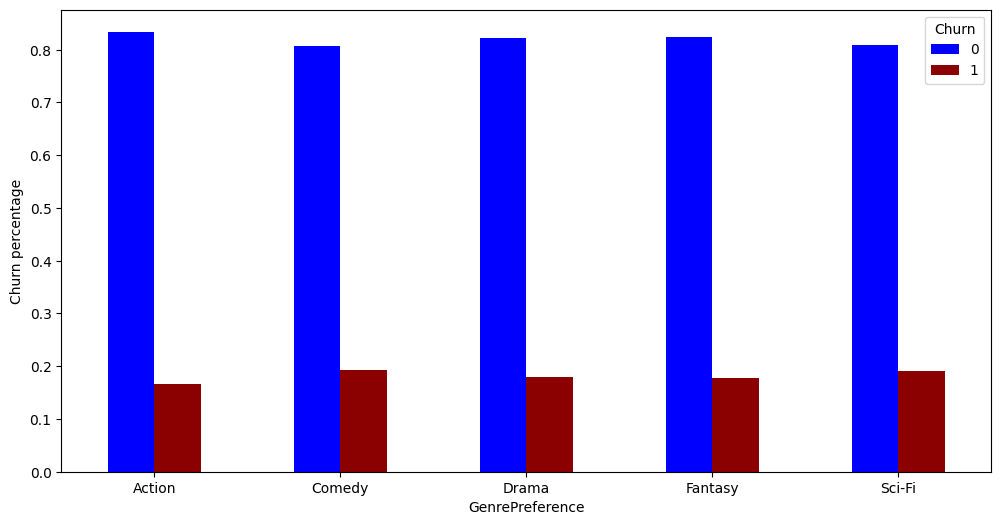

In [32]:
bar_plot(train_df, "GenrePreference", "Churn")

<Axes: >

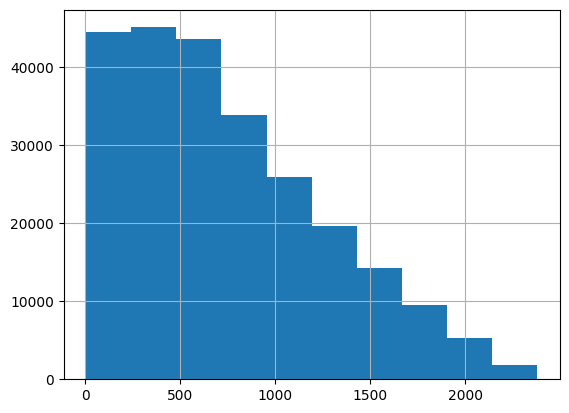

In [33]:
train_df.TotalCharges.hist()

<Axes: >

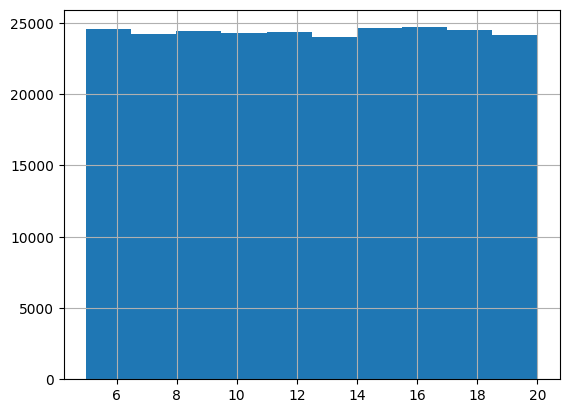

In [34]:
train_df.MonthlyCharges.hist()

<Axes: >

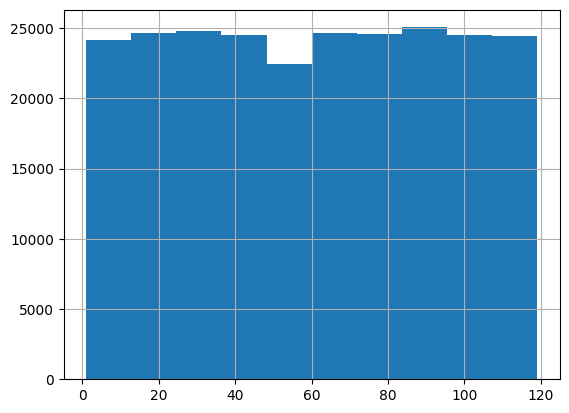

In [35]:
train_df.AccountAge.hist()

### Encoding categorical features for train_df

In [36]:
print(categorical_feature)

{'ParentalControl', 'ContentType', 'SubscriptionType', 'GenrePreference', 'SubtitlesEnabled', 'PaperlessBilling', 'PaymentMethod', 'DeviceRegistered', 'MultiDeviceAccess', 'Gender'}


In [37]:
# we endode the categorical column
cat_encoder = LabelEncoder()
for features in categorical_feature:
    train_df[features] = cat_encoder.fit_transform(train_df[features])

In [38]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,1,3,0,0,0,1,36.758104,63.531377,10,4,2.176498,4,1,3,0,0,0
1,57,5.175208,294.986882,0,1,1,1,0,3,32.450568,25.725595,18,0,3.478632,8,1,23,0,1,0
2,73,12.106657,883.785952,0,3,1,1,0,0,7.395160,57.364061,23,3,4.238824,6,1,1,1,1,0
3,32,7.263743,232.439774,0,2,0,2,0,3,27.960389,131.537507,30,2,4.276013,2,1,24,1,1,0
4,57,16.953078,966.325422,1,2,1,2,0,2,20.083397,45.356653,20,1,3.616170,4,0,0,0,0,0


<Axes: >

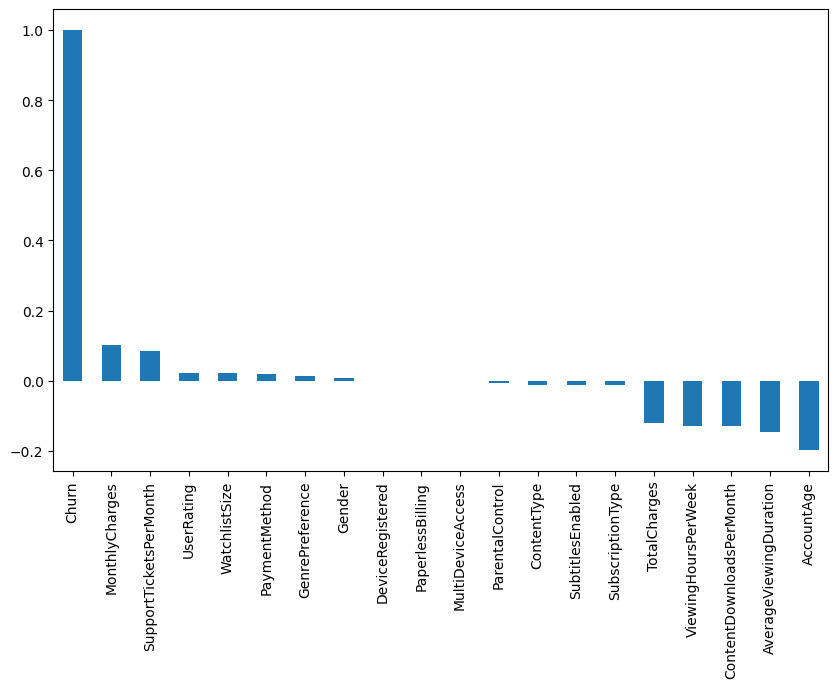

In [39]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(10,6))
train_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

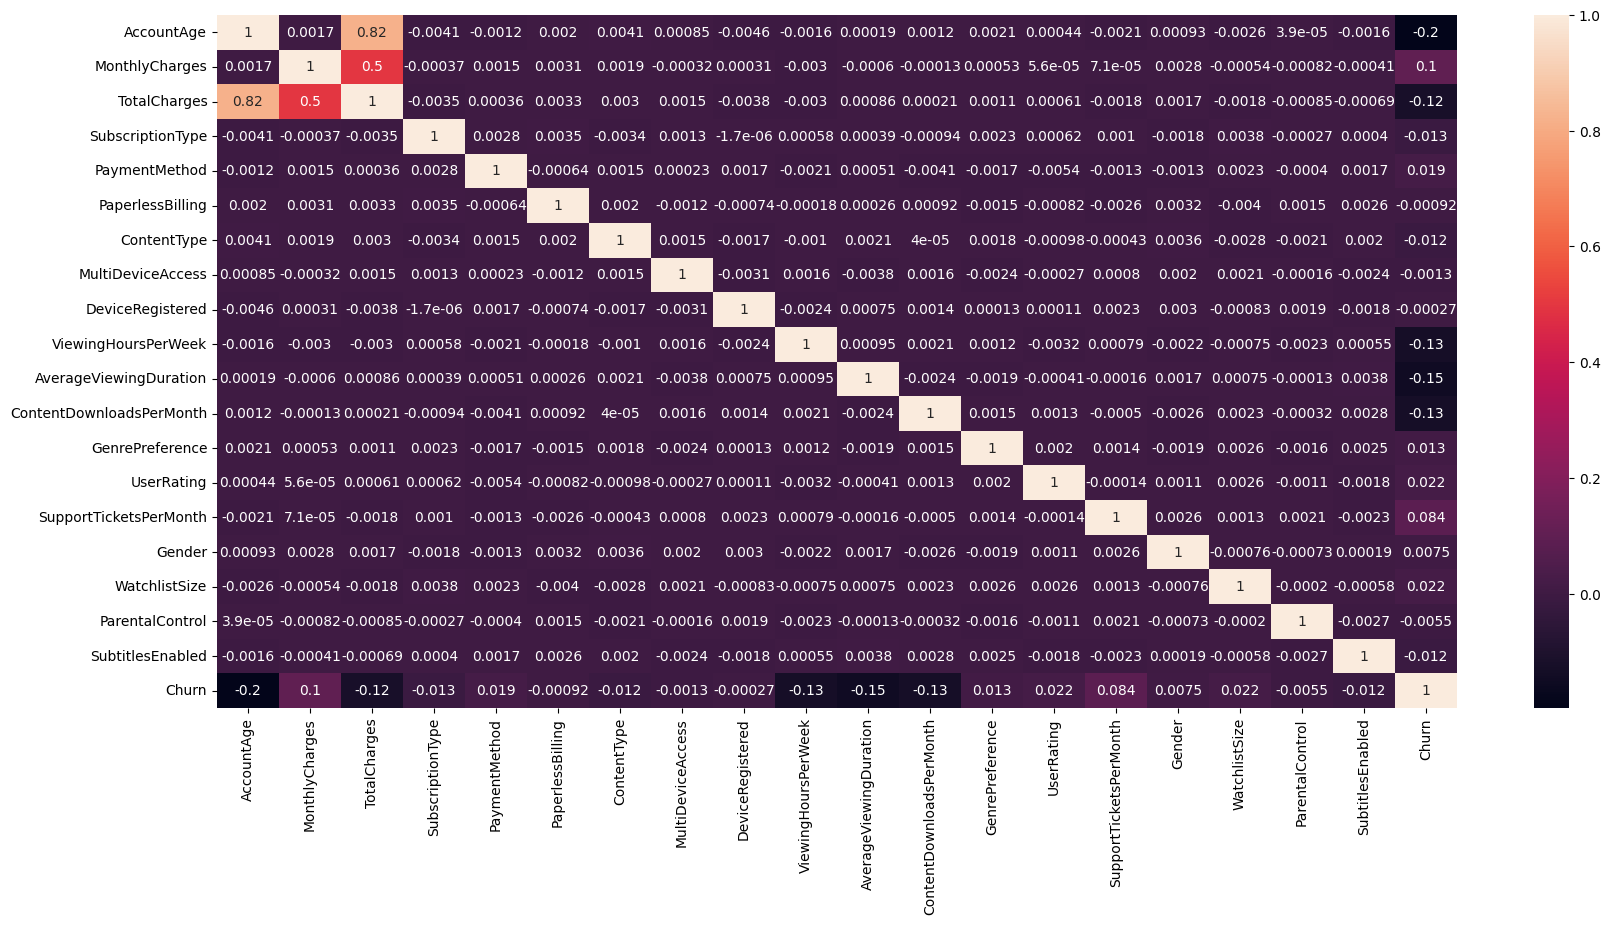

In [40]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(train_df.corr(), annot=True)


### Encoding categorical features for test_df

In [41]:
test_df.drop(columns=['CustomerID'], inplace=True)

In [42]:
# numerical feature
numerical_feature_test = {feature for feature in test_df.columns if test_df[feature].dtypes != 'O'}
print(f'Count of numerical feature: {len(numerical_feature_test)}')
print(f'numerical feature are:\n {numerical_feature_test}')


Count of numerical feature: 9
numerical feature are:
 {'WatchlistSize', 'MonthlyCharges', 'AverageViewingDuration', 'TotalCharges', 'ContentDownloadsPerMonth', 'UserRating', 'ViewingHoursPerWeek', 'SupportTicketsPerMonth', 'AccountAge'}


In [43]:
# Categorical feature
categorical_feature_test = {feature for feature in test_df.columns if test_df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature_test)}')
print(f'Categorical feature are:\n {categorical_feature_test}')


Count of Categorical feature: 10
Categorical feature are:
 {'ParentalControl', 'ContentType', 'SubscriptionType', 'GenrePreference', 'SubtitlesEnabled', 'PaperlessBilling', 'PaymentMethod', 'DeviceRegistered', 'MultiDeviceAccess', 'Gender'}


In [44]:
print(categorical_feature_test)

{'ParentalControl', 'ContentType', 'SubscriptionType', 'GenrePreference', 'SubtitlesEnabled', 'PaperlessBilling', 'PaymentMethod', 'DeviceRegistered', 'MultiDeviceAccess', 'Gender'}


In [45]:
test_encoder = LabelEncoder()
for features in categorical_feature_test:
    test_df[features] = test_encoder.fit_transform(test_df[features])

In [46]:
test_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled
0,38,17.869374,679.036195,1,3,0,2,0,2,29.126308,122.274031,42,1,3.522724,2,1,23,0,0
1,77,9.912854,763.289768,0,2,1,2,0,2,36.873729,57.093319,43,0,2.021545,2,0,22,1,0
2,5,15.019011,75.095057,2,0,0,2,1,0,7.601729,140.414001,14,4,4.806126,2,0,22,0,1
3,88,15.357406,1351.451692,2,2,0,0,1,3,35.586430,177.002419,14,1,4.943900,0,0,23,1,1
4,91,12.406033,1128.949004,2,1,1,2,1,3,23.503651,70.308376,6,2,2.846880,6,0,0,0,0


In [47]:
test_df.shape

(104480, 19)

spliting the train_df into dependent (Y) and independent variable(X)

In [48]:
X = train_df.drop(columns= ['Churn'])
Y = train_df['Churn']

### Feature selection

we will be selecting the best 10 features with the best correlation with the churn column

In [49]:
# select features with the best correlation
selection = SelectKBest(k=10)
X = selection.fit_transform(X,Y)

### showing which feature correlate more with the dependent variable and they are denote as True, whiles  other are removed and denoted asfalse


In [50]:
train_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'Churn'],
      dtype='object')

In [51]:
selection.get_support()

array([ True,  True,  True, False,  True, False, False, False, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False])

According to the feature selection, we selected 10 out of 21 features with the most correlation.

The 10 features that were selected ['AccountAge', 'MonthlyCharges', 'TotalCharges','PaymentMethod','ViewingHoursPerWeek', 'AverageViewingDuration','ContentDownloadsPerMonth', 'UserRating','SupportTicketsPerMonth', 'WatchlistSize']


now we split the train_df into train and test


In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 42)

In [53]:
print("the shape of the X_train data", x_train.shape)
print("the shape of the X_test data", x_test.shape)
print("the shape of the y_train data", y_train.shape)
print("the shape of the y_test data", y_test.shape)

the shape of the X_train data (195029, 10)
the shape of the X_test data (48758, 10)
the shape of the y_train data (195029,)
the shape of the y_test data (48758,)


## Traing Machine Learning Models

we will be training 3 ML models to compare
* Logistic Regression
* RandomForest Classification
* Decision Tree Classifier

### Training and testing Random forest model

In [54]:
lr_model = LogisticRegression(C=150, max_iter=150)
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=150, max_iter=150)

In [55]:
lr_pred = lr_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(lr_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(lr_pred, y_test)}')
print(f'Classification report :\n {classification_report(lr_pred, y_test)}')


Accuracy score : 0.8244390664096148
Confusion matrix :
 [[39192  7784]
 [  776  1006]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     46976
           1       0.11      0.56      0.19      1782

    accuracy                           0.82     48758
   macro avg       0.55      0.70      0.55     48758
weighted avg       0.95      0.82      0.88     48758



the model recorded an accuracy score of about 82%, which implies that the random forest model was able to predict about 8 out of 10 of the customers churning or not correctly


### Training a randomForest model

In [56]:
R_model = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=100, min_samples_split=5)
R_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=5,
                       n_estimators=120)

In [57]:
R_pred = R_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(R_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(R_pred, y_test)}')
print(f'Classification report :\n {classification_report(R_pred, y_test)}')

Accuracy score : 0.8230444234792239
Confusion matrix :
 [[39589  8249]
 [  379   541]]
Classification report :
               precision    recall  f1-score   support

           0       0.99      0.83      0.90     47838
           1       0.06      0.59      0.11       920

    accuracy                           0.82     48758
   macro avg       0.53      0.71      0.51     48758
weighted avg       0.97      0.82      0.89     48758



although the Randomforest model is slightly more accurate than the Logistic model by very small fractions
the model recorded an accuracy score of about 82.37%, which implies that the random forest model was able to predict about 8 out of 10 of the customers churning or not correctly


## Training using Decision Tree

In [58]:
# decisionTree Classifier
tree_model = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
tree_model.fit(x_train, y_train)


DecisionTreeClassifier(min_samples_leaf=15, splitter='random')

In [59]:
tree_pred = tree_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(tree_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(tree_pred, y_test)}')
print(f'Classification report :\n {classification_report(tree_pred, y_test)}')


Accuracy score : 0.8085852578038476
Confusion matrix :
 [[38145  7510]
 [ 1823  1280]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.84      0.89     45655
           1       0.15      0.41      0.22      3103

    accuracy                           0.81     48758
   macro avg       0.55      0.62      0.55     48758
weighted avg       0.90      0.81      0.85     48758



Decision tree seems to have the lowest accuracy score of the three models with about 81%

#### our datasets is very imbalance which might affect the accuracy of our model performance, although our models performance seems ok. we need to do some over sampling on the data to reduce the occurances of TN, FN and and improve FP and TP of the model

### Using SMOTEENN for imbalance dataset:


In [60]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it



In [61]:
from imblearn.combine import SMOTEENN
from collections import Counter

smot = SMOTEENN()
x_train_2, y_train_2 = smot.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_2)))


The number of classes before fit Counter({0: 159637, 1: 35392})
The number of classes after fit Counter({1: 143731, 0: 82336})


In [62]:
# splitting the over sampling dataset
x_train_sap, x_test_sap, y_train_sap, y_test_sap = train_test_split(x_train_2, y_train_2, test_size=0.2)


### Training Logistic Regression on the sampling set

In [63]:
# logistic regression
lr_samp = LogisticRegression(C=10, max_iter=150)
lr_samp.fit(x_train_sap, y_train_sap)

LogisticRegression(C=10, max_iter=150)

In [64]:
lr_samp_pred = lr_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(lr_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(lr_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(lr_samp_pred, y_test_sap)}')

Accuracy score : 0.787875436811607
Confusion matrix :
 [[11035  4231]
 [ 5360 24588]]
Classification report :
               precision    recall  f1-score   support

           0       0.67      0.72      0.70     15266
           1       0.85      0.82      0.84     29948

    accuracy                           0.79     45214
   macro avg       0.76      0.77      0.77     45214
weighted avg       0.79      0.79      0.79     45214



### Training Random forest classifier on the sample set

In [65]:
# Random forest classifier
Rand_samp = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rand_samp.fit(x_train_sap, y_train_sap)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=6,
                       n_estimators=150)

In [66]:
Rand_samp_pred = Rand_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(Rand_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Rand_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Rand_samp_pred, y_test_sap)}')


Accuracy score : 0.878953421506613
Confusion matrix :
 [[13010  2088]
 [ 3385 26731]]
Classification report :
               precision    recall  f1-score   support

           0       0.79      0.86      0.83     15098
           1       0.93      0.89      0.91     30116

    accuracy                           0.88     45214
   macro avg       0.86      0.87      0.87     45214
weighted avg       0.88      0.88      0.88     45214



# insights:
* The model achieved an accuracy score of 0.88. The confusion matrix shows 12,995 true negatives (TN), 1,994 false positives (FP), 3,456 false negatives (FN), and 26,773 true positives (TP).

* Precision for class 0 (non-churn) is 0.79, and for class 1 (churn) is 0.93. Recall for class 0 is 0.87, and for class 1 is 0.89.

* The F1-score for class 0 is 0.83, and for class 1 is 0.91.

In summary, the model exhibits strong performance, with balanced precision, recall, and F1-score across both classes.

### Training GradientBoosting Classifier on the sample set

In [67]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train_sap, y_train_sap)

GradientBoostingClassifier()

In [68]:
pred = gbc.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.8810103065422215
Confusion matrix :
 [[13714  2699]
 [ 2681 26120]]
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     16413
           1       0.91      0.91      0.91     28801

    accuracy                           0.88     45214
   macro avg       0.87      0.87      0.87     45214
weighted avg       0.88      0.88      0.88     45214



### insights:
* The model achieved an accuracy score of 0.88. The confusion matrix shows 13,756 true negatives (TN), 2,642 false positives (FP), 2,695 false negatives (FN), and 26,125 true positives (TP).

* Precision for class 0 (non-churn) is 0.84, and for class 1 (churn) is 0.91. Recall for class 0 is 0.84, and for class 1 is 0.91.

* The F1-score for class 0 is 0.84, and for class 1 is 0.91.

In summary, the model exhibits strong performance, with balanced precision, recall, and F1-score across both classes. although it predicts churn more accurately than other models

### HyperParameter Tunning

we will perform hyper parameter tuning for the Gradientsearch classifier only because it has the highest predicting accuracy

In [69]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }


In [70]:
#gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
#gbc_optm.fit(x_train_sap, y_train_sap)


In [71]:
# now we check for the best estimator
#gbc_optm.best_estimator_

In [72]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.2,
                           max_depth=17, max_leaf_nodes=24, min_samples_leaf=13,
                           min_samples_split=7, n_estimators=200)
gbc_tunning.fit(x_train_sap, y_train_sap)
pred = gbc_tunning.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')


Accuracy score : 0.9117308798159862
Confusion matrix :
 [[14922  2518]
 [ 1473 26301]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     17440
           1       0.91      0.95      0.93     27774

    accuracy                           0.91     45214
   macro avg       0.91      0.90      0.91     45214
weighted avg       0.91      0.91      0.91     45214



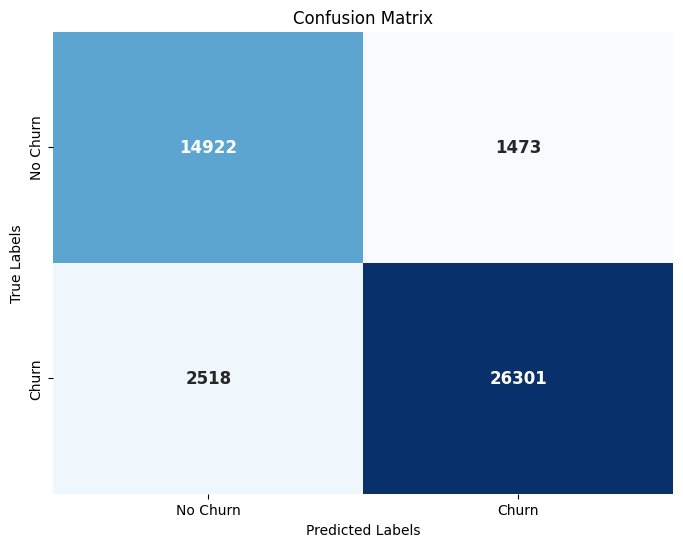

In [73]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_sap, pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**After Oversampling the dataset our model performs is pretty good. From our 4 model GradientBoostClassifier performs better than all. So we dumb our model using pickle library**

* The model achieved an accuracy of 91.27%, indicating that it correctly predicted churn status for 91.27% of the cases.
*The confusion matrix shows that among 17,428 non-churn instances, 14,902 were correctly classified, while 2,526 were incorrectly classified as churn.
* Among 27,825 churn instances, 26,401 were correctly classified, and 1,424 were incorrectly classified as non-churn.
* Precision, recall, and F1-score for both classes are high, indicating a balanced performance in identifying both churn and non-churn instances.
* Overall, the model demonstrates strong predictive capabilities for churn, with a balance between precision and recall for both churn and non-churn cases.





## **Saving the Model**

In [74]:
import pickle

In [75]:
filename = 'Model.sav'
pickle.dump(gbc_tunning, open(filename,'wb'))

In [76]:
load_model = pickle.load(open(filename, 'rb'))

In [77]:
load_model.score(x_test_sap, y_test_sap)


0.9117308798159862

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

we need to make the columns oe features on test_df to be consistent with the features in train_df that we used to train the model.

In [78]:
# Assuming you want to keep only the specified columns
columns_to_keep = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod',
                   'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
                   'SupportTicketsPerMonth', 'WatchlistSize']
# Create a new DataFrame with only the desired columns
test_df_copy = test_df[columns_to_keep].copy()


In [79]:
# Make predictions on the test data
predicted_probabilities = gbc_tunning.predict_proba(test_df_copy)[:, 1]

In [80]:
test_url1 = r'/content/drive/MyDrive/test.csv'
df_test = pd.read_csv(test_url1)
df_test.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [81]:
# Create prediction_df DataFrame
prediction_df = pd.DataFrame({
    'CustomerID': df_test['CustomerID'],  # Assuming 'CustomerID' is the column name in your test_df
    'predicted_probability': predicted_probabilities
})

# Check the number of entries in prediction_df
print("Number of entries in prediction_df:", len(prediction_df))


Number of entries in prediction_df: 104480


In [82]:
# Save prediction_df to a CSV file
prediction_df.to_csv('predictions.csv', index=False)

In [83]:
prediction_df.head()

,CustomerID,predicted_probability
0,O1W6BHP6RM,0.132177
1,LFR4X92X8H,0.029807
2,QM5GBIYODA,0.853804
3,D9RXTK2K9F,0.011923
4,ENTCCHR1LR,0.196441


In [84]:
prediction_df.describe().T

,count,mean,std,min,25%,50%,75%,max
predicted_probability,104480.0,0.322832,0.281464,0.002897,0.07673,0.225912,0.535417,0.997201
